In [1]:
# pwd = "/Users/youtao/code"
pwd = "/scratch/ty296"
hdf5_data_path = '/scratch/ty296/hdf5_data/'
groupname = 'L'
p_fixed_name = 'p_ctrl'
p_fixed_value = 0.4
import os
print(os.getcwd())
import sys
sys.path.append('/scratch/ty296/CT_MPS_mini')
import h5py
import numpy as np

/scratch/ty296


In [2]:
# View singular values from your HDF5 file
filename = os.path.join(pwd, "hdf5_data_combined/sv_combined_p_ctrl0.0.h5")
print(filename)
real_num = 0
with h5py.File(filename, 'r') as f:
    # Get the first key to examine
    first_key = list(f.keys())[real_num]
    print(f"Examining key: {first_key}")
    
    # Get the singular values array
    sv_array = f[first_key][()]
    
    # Display basic info
    print(f"Shape: {sv_array.shape}")
    print(f"Data type: {sv_array.dtype}")
    print(f"Number of singular values: {len(sv_array)}")
    
    # Display the actual values
    print(f"\nSingular values:")
    print(sv_array)
    
    # Display metadata
    print(f"\nMetadata:")
    for attr_name, attr_value in f[first_key].attrs.items():
        print(f"  {attr_name}: {attr_value}")


/scratch/ty296/hdf5_data_combined/sv_combined_p_ctrl0.0.h5
Examining key: real1
Shape: (1,)
Data type: float64
Number of singular values: 1

Singular values:
[1.]

Metadata:
  L: 20
  maxbond: 1
  maxdim: 512
  n_chunk_realizations: 10
  p_ctrl: 0.0
  p_proj: 1.0
  seed: 8589


In [3]:
with h5py.File(filename, 'r') as f:
    L_target = 24
    matching_groups = []
    
    print(f"Searching for groups with L={L_target}...")
    print("=" * 80)
    
    # Loop through all realizations
    for key in f.keys():
        # Check if this group has L=24
        if 'L' in f[key].attrs and f[key].attrs['L'] == L_target:
            matching_groups.append(key)
    
    print(f"Found {len(matching_groups)} groups with L={L_target}")
    print()
    
    # # Display information for each matching group
    # for i, key in enumerate(matching_groups):
    #     sv_array = f[key][()]
    #     attrs = dict(f[key].attrs)
        
    #     print(f"Group {i+1}: {key}")
    #     print(f"  L = {attrs.get('L')}")
    #     print(f"  p_ctrl = {attrs.get('p_ctrl')}")
    #     print(f"  p_proj = {attrs.get('p_proj')}")
    #     print(f"  maxbond = {attrs.get('maxbond')}")
    #     print(f"  Singular value array shape: {sv_array.shape}")
    #     print(f"  Singular values: {sv_array}")
    #     print(f"  Max SV: {np.max(sv_array):.6e}")
    #     print(f"  Min SV: {np.min(sv_array):.6e}")
    #     print(f"  Number of SVs: {len(sv_array)}")
    #     print("-" * 60)


Searching for groups with L=24...


KeyboardInterrupt: 

In [ ]:
# Plot singular values for all L=24 groups
L24_groups = []

with h5py.File(filename, 'r') as f:
    L_target = 24
    
    # Collect all L=24 groups
    for key in f.keys():
        if 'L' in f[key].attrs and f[key].attrs['L'] == L_target:
            L24_groups.append(key)


In [ ]:
dict_min_sv = {}
for key in L24_groups[:]:
    with h5py.File(filename, 'r') as f:
        # print(f[key].attrs.keys())
        min_sv = min(f[key][()])
        # print(f[key].attrs.keys())
        p_proj = f[key].attrs['p_proj']
        seed = f[key].attrs['seed']
        if p_proj in dict_min_sv:
            dict_min_sv[p_proj].append((np.log10(min_sv), seed))
        else:
            dict_min_sv[p_proj] = [(np.log10(min_sv), seed)]
        # if min_sv < 1e-10:
        #     print(min_sv, p_proj)

        # print(min_sv.shape)


In [ ]:
for min_sv, seed in dict_min_sv[0.2]:
    if min_sv < -10:
        print(min_sv, seed)

-11.201137632842066 3695
-12.214354667491111 4974
-10.320381733276218 7450
-13.770633413230309 1908
-14.096749602810473 1113
-12.954795391019925 4737
-10.584453015374645 5477
-12.514380269424889 8905
-14.30382185513801 1879
-14.143751935160278 5334
-14.03456330981326 3638
-10.779696183822136 4061
-11.011369073718164 2610
-13.157794405909303 8160
-13.487742475219926 4695
-10.421646059154071 5789
-13.38870681073009 3041
-10.359500068211206 6366
-14.487355001592004 2269
-10.303021529690662 8588
-11.628082861103955 7516
-12.031856237608967 4743
-13.897844827748896 4680
-12.435086096743797 420
-13.422607113741035 5293
-10.587545791625988 167
-11.136860786590042 8247
-12.204068143731826 6395
-10.620225128233828 2850
-12.967107838906784 3190
-12.118367769245603 257
-10.156229746375876 6702
-12.129191156088089 2580
-15.147304626627157 8603
-12.144519821353295 1216
-11.735544960014131 471
-11.355820667094976 3353
-12.627651106902647 2201
-10.268234663996136 5919
-13.48670466943051 91
-12.953409

0 0.24210526315789474 1690
1 0.28421052631578947 1690
2 0.3263157894736842 1690
3 0.3684210526315789 1697
4 0.4105263157894737 1700
5 0.45263157894736844 1700
6 0.49473684210526314 1700


/tmp/ipykernel_47255/3301321970.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


7 0.5368421052631579 1700
8 0.5789473684210527 1700
9 0.6210526315789474 1700
10 0.6631578947368421 1700


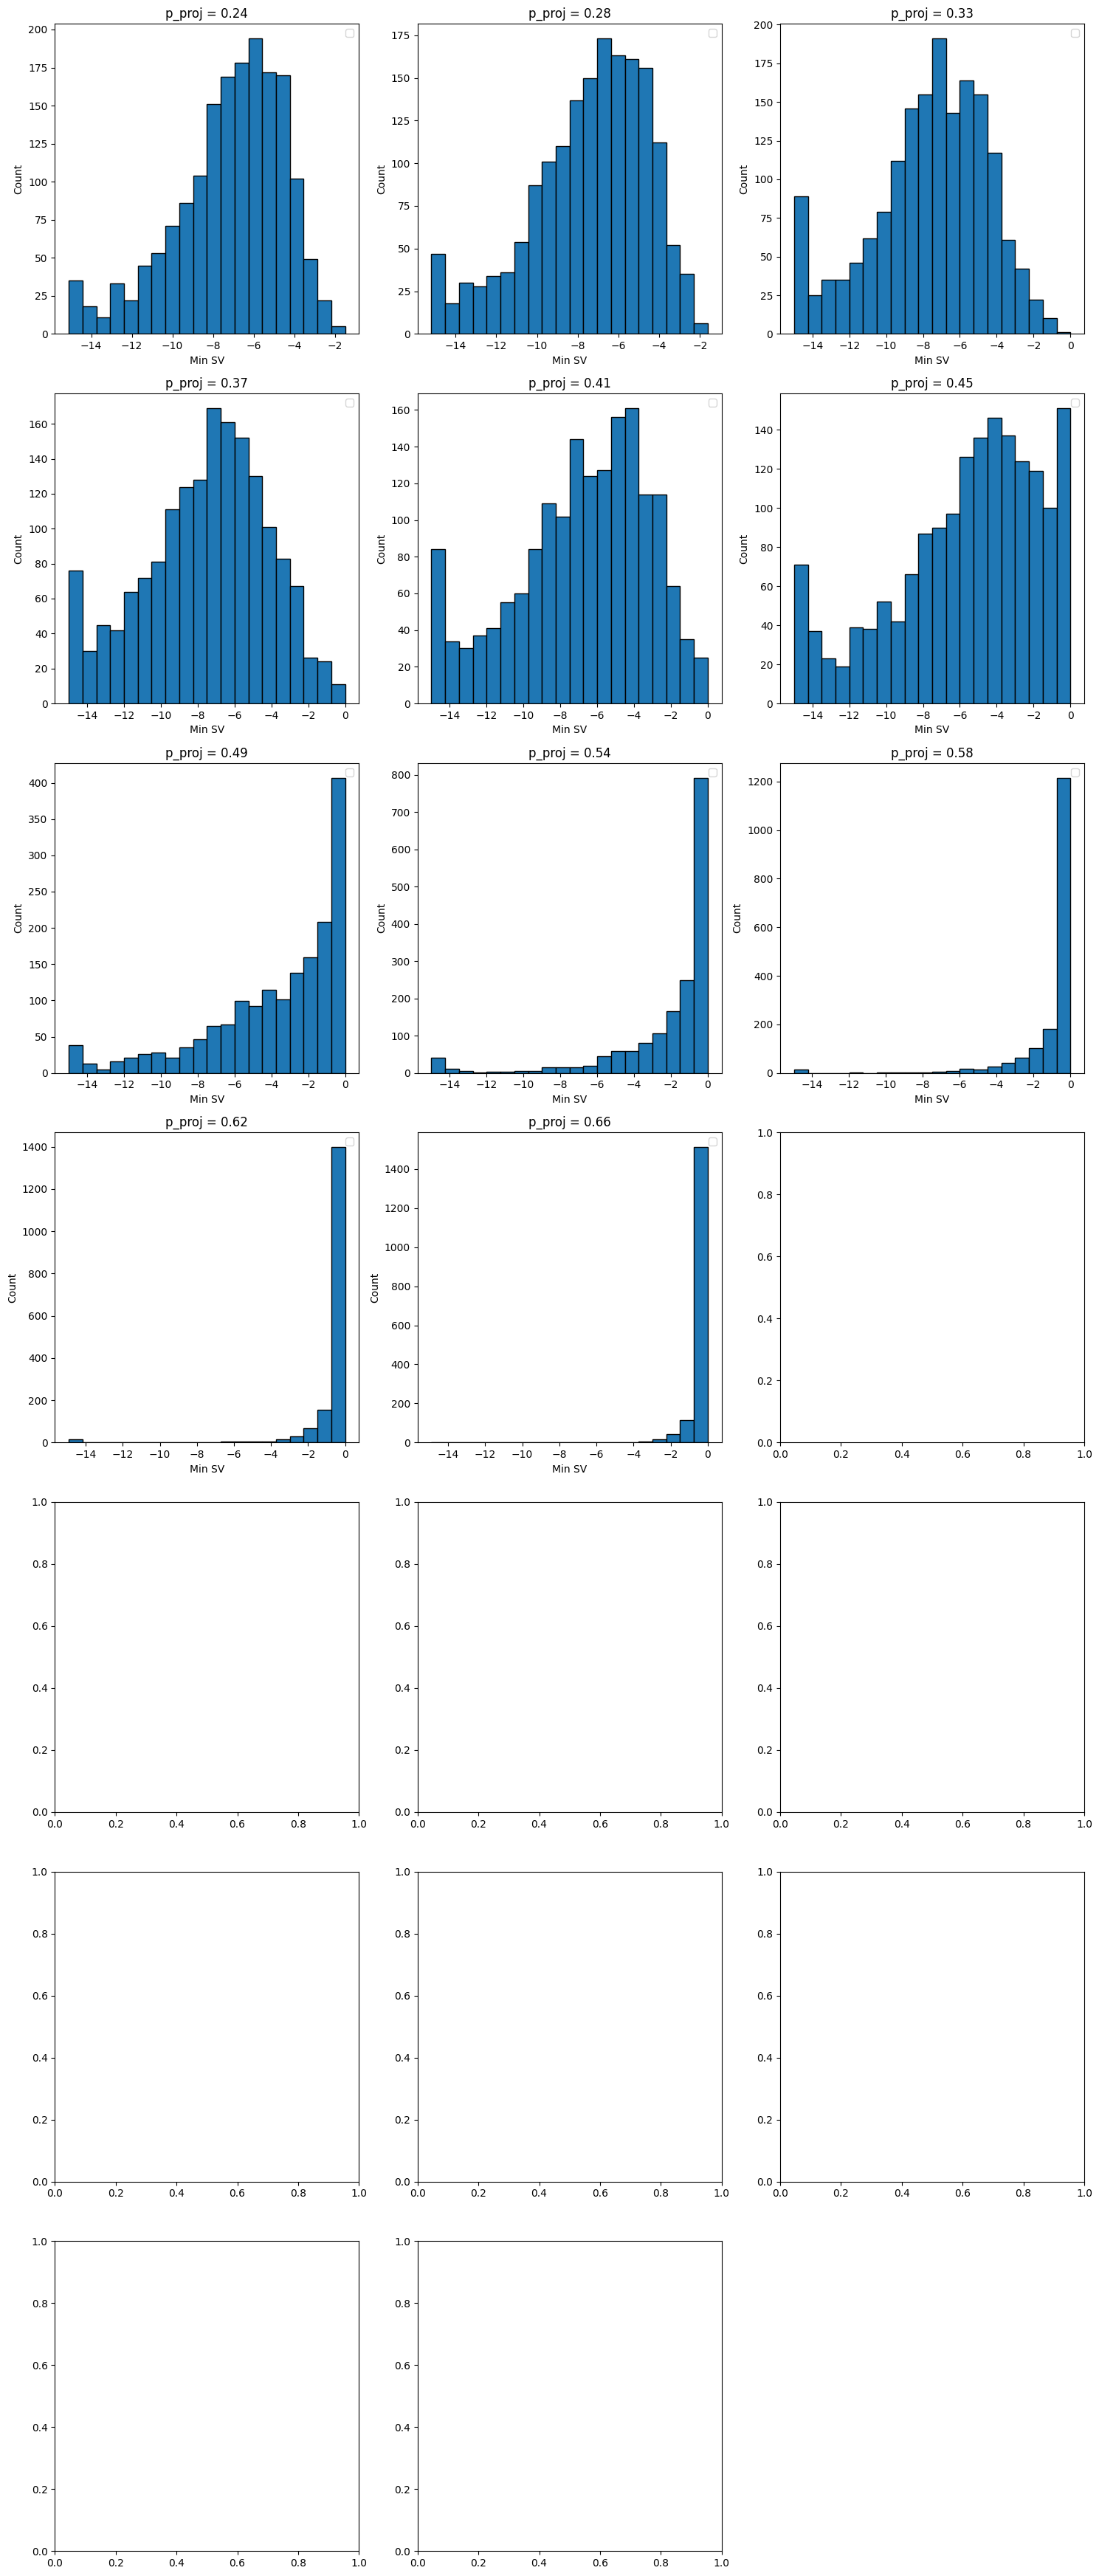

In [ ]:
import matplotlib.pyplot as plt
from read_hdf5_func import calculate_variance_and_error, calculate_mean_and_error

# Create a figure with subplots arranged based on number of p_proj values
n_plots = len(dict_min_sv)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plot histogram for each p_proj value
for idx, (p_proj, sv_seed_list) in enumerate(sorted(dict_min_sv.items())[1:12]):
    # print(idx, p_proj, sv_seed_list)
    min_svs = [sv for sv, seed in sv_seed_list]
    print(idx, p_proj, len(min_svs))
    ax = axes[idx]
    mean, sem = calculate_mean_and_error(min_svs)
    var, semvar = calculate_variance_and_error(min_svs)
    ax.hist(min_svs, bins=20, edgecolor='black')
    ax.set_title(f'p_proj = {p_proj:.2f}')
    ax.set_xlabel('Min SV')
    ax.set_ylabel('Count')
    # ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.4f}')
    # ax.axvline(mean + var, color='blue', linestyle='--', label=f'Variance: {var:.4f}')
    # ax.axvline(mean - var, color='blue', linestyle='--')
    ax.legend()

# Remove any empty subplots
for idx in range(len(dict_min_sv), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [ ]:
from read_hdf5_func import von_neumann_entropy_sv
dict = {}
with h5py.File(filename, 'r') as f:
    for key in L24_groups:
        entropy = von_neumann_entropy_sv(f[key][()], n=0, positivedefinite=False, threshold=1e-15)
        p_proj = f[key].attrs['p_proj']
        if p_proj in dict:
            dict[p_proj].append(entropy)
        else:
            dict[p_proj] = [entropy]
        # print(entropy)
        # print(f[key].attrs['p_proj'])

In [ ]:
print(len(dict))

20


1690 0.2
1690 0.24210526315789474
1690 0.28421052631578947
1690 0.3263157894736842
1697 0.3684210526315789
1700 0.4105263157894737
1700 0.45263157894736844
1700 0.49473684210526314
1700 0.5368421052631579
1700 0.5789473684210527
1700 0.6210526315789474
1700 0.6631578947368421
1700 0.7052631578947368
1700 0.7473684210526316
1700 0.7894736842105263
1700 0.8315789473684211
1709 0.8736842105263158
1710 0.9157894736842105
1710 0.9578947368421052
1710 1.0


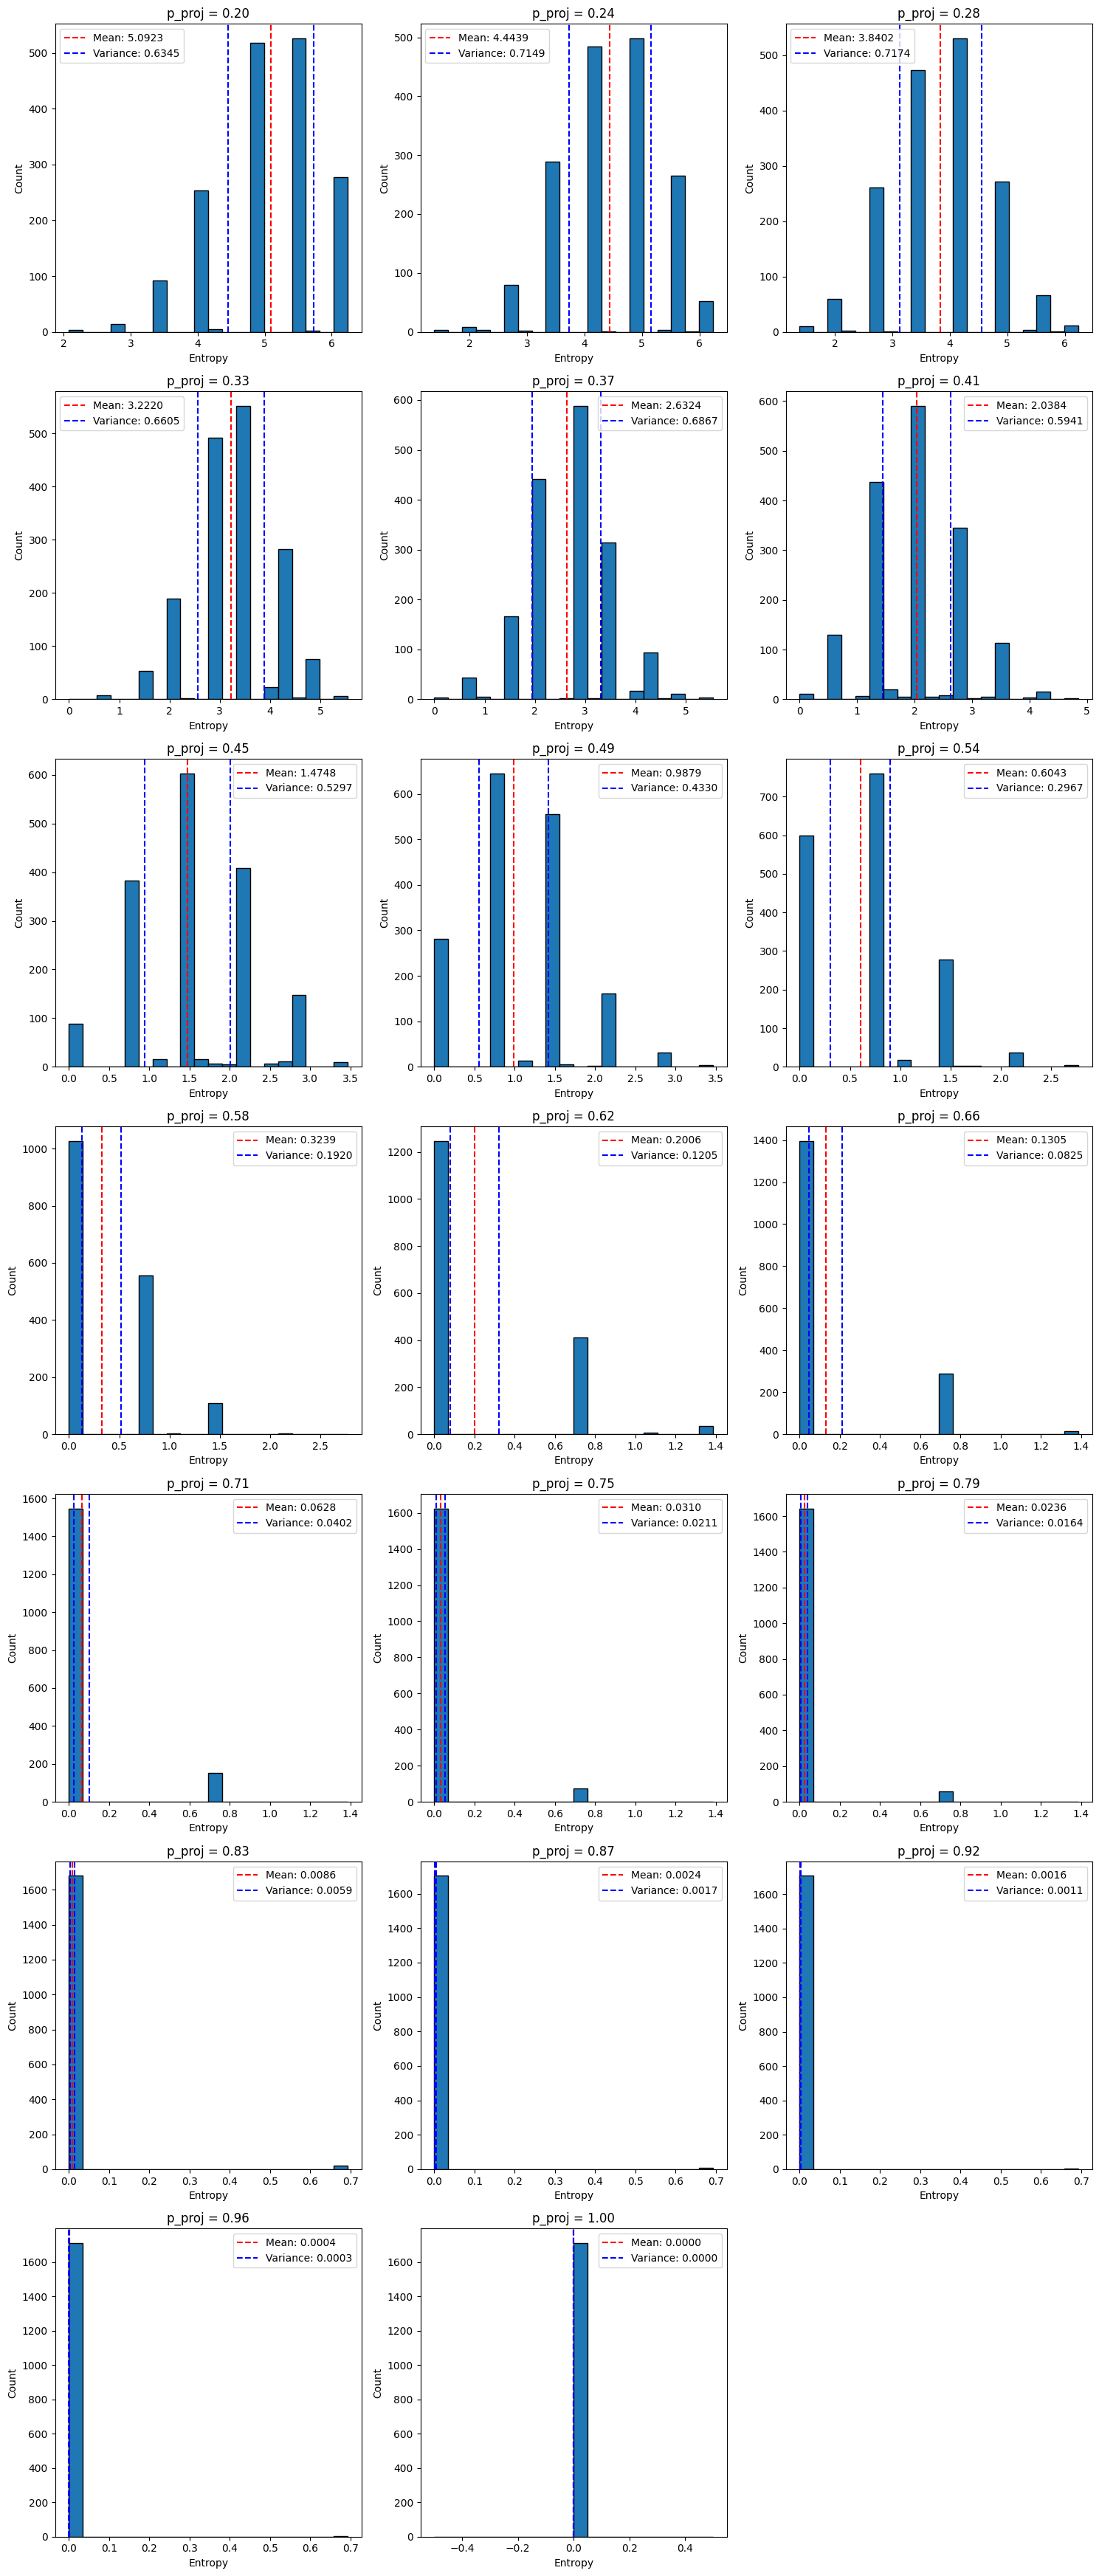

In [ ]:
import matplotlib.pyplot as plt
from read_hdf5_func import calculate_variance_and_error, calculate_mean_and_error

# Create a figure with subplots arranged based on number of p_proj values
n_plots = len(dict)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plot histogram for each p_proj value
for idx, (p_proj, entropies) in enumerate(sorted(dict.items())):
    ax = axes[idx]
    mean, sem = calculate_mean_and_error(entropies)
    var, semvar = calculate_variance_and_error(entropies)
    print(len(entropies), p_proj)
    ax.hist(entropies, bins=20, edgecolor='black')
    ax.set_title(f'p_proj = {p_proj:.2f}')
    ax.set_xlabel('Entropy')
    ax.set_ylabel('Count')
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.4f}')
    ax.axvline(mean + var, color='blue', linestyle='--', label=f'Variance: {var:.4f}')
    ax.axvline(mean - var, color='blue', linestyle='--')
    ax.legend()

# Remove any empty subplots
for idx in range(len(dict), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [ ]:
dict_maxbond = {}
with h5py.File(filename, 'r') as f:
    for key in L24_groups:
        maxbond = f[key].attrs['maxbond']
        p_proj = f[key].attrs['p_proj']
        if p_proj in dict_maxbond:
            dict_maxbond[p_proj].append(maxbond)
        else:
            dict_maxbond[p_proj] = [maxbond]
        # print(entropy)
        # print(f[key].attrs['p_proj'])

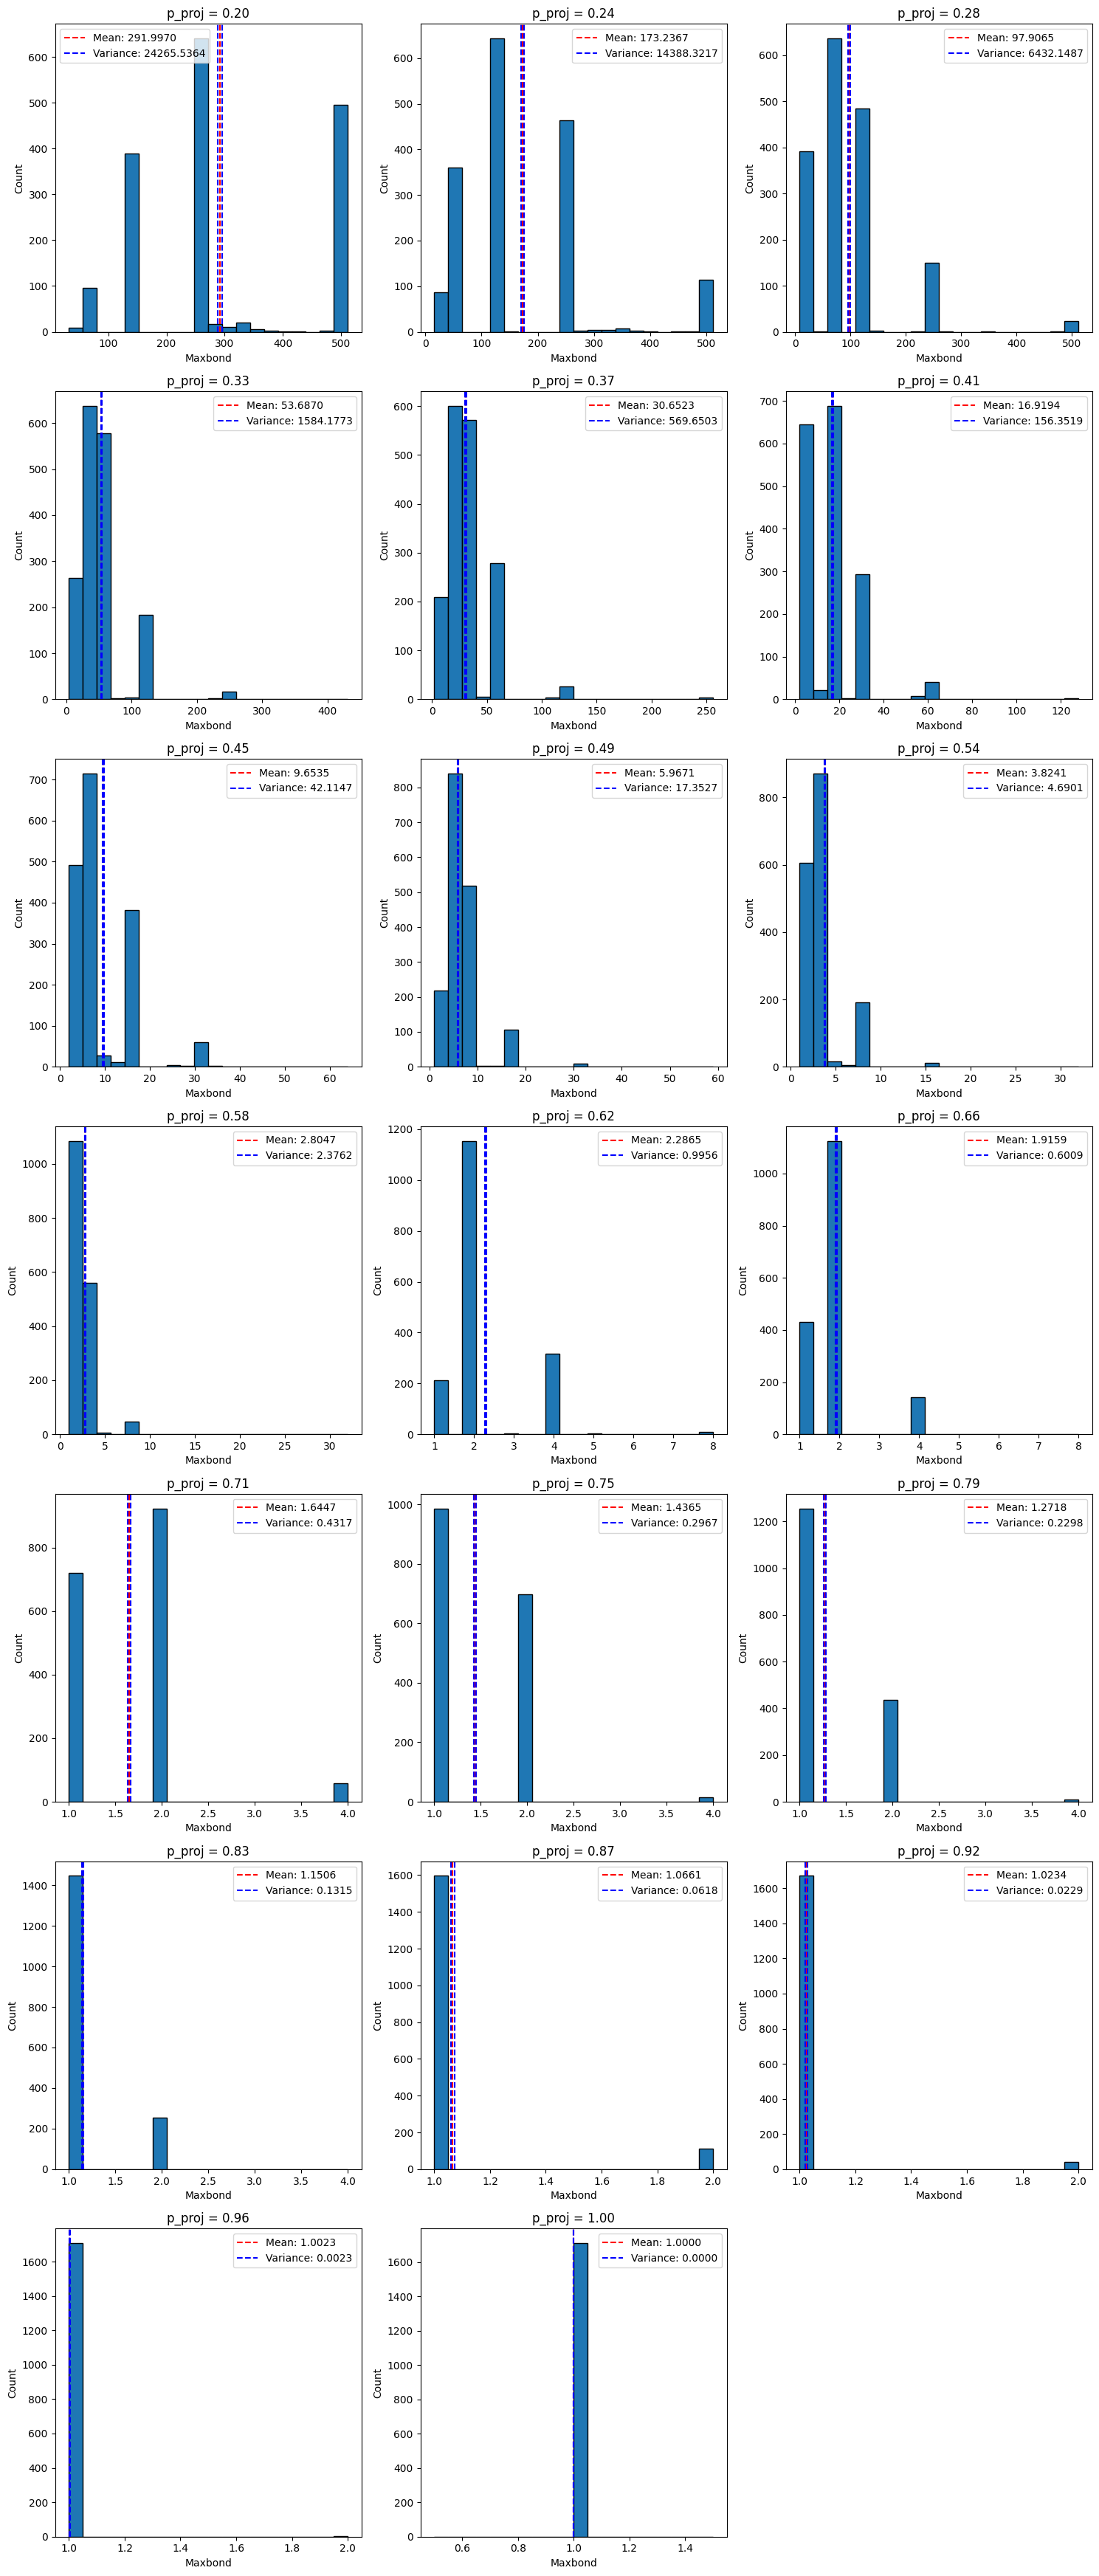

In [ ]:
import matplotlib.pyplot as plt
from read_hdf5_func import calculate_variance_and_error, calculate_mean_and_error

# Create a figure with subplots arranged based on number of p_proj values
n_plots = len(dict_maxbond)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plot histogram for each p_proj value
for idx, (p_proj, maxbonds) in enumerate(sorted(dict_maxbond.items())):
    ax = axes[idx]
    mean, sem = calculate_mean_and_error(maxbonds)
    var, semvar = calculate_variance_and_error(maxbonds)
    # print(maxbonds)
    ax.hist(maxbonds, bins=20, edgecolor='black')
    ax.set_title(f'p_proj = {p_proj:.2f}')
    ax.set_xlabel('Maxbond')
    ax.set_ylabel('Count')
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.4f}')
    ax.axvline(mean + sem, color='blue', linestyle='--', label=f'Variance: {var:.4f}')
    ax.axvline(mean - sem, color='blue', linestyle='--')
    ax.legend()

# Remove any empty subplots
for idx in range(len(dict), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()
